# **Map SalishSea**

In [5]:
%matplotlib inline
import numpy as np
import xarray as xr
import os
from matplotlib import pyplot as plt, animation, rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
from cartopy import crs, feature
import cmocean


cmap = cmocean.cm.deep

## Paths

In [6]:
# Define paths
paths = {
    'NEMO': '/results2/SalishSea/nowcast-green.201905/',
    'coords': '/Users/jvalenti/MOAD/SSC_masks/coordinates_seagrid_SalishSea201702.nc',
    'mask': '/Users/jvalenti/MOAD/SSC_masks/mesh_maskBat201702.nc',
    'out': '/Users/jvalenti/MOAD/analysis-jose/notebooks/results/',
}

## Simulation

In [7]:
coords = xr.open_dataset(paths['coords'], decode_times=False)
mask = xr.open_dataset(paths['mask'])

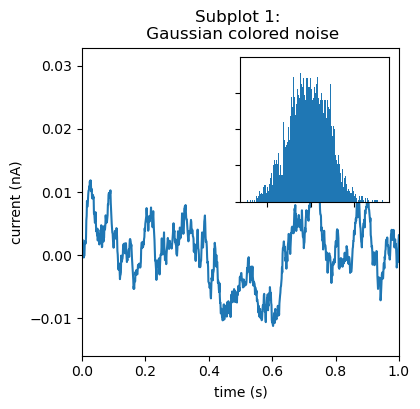

In [8]:
# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000]/0.05)               # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)]*dt  # colored noise

fig = plt.figure(figsize=(9, 4),facecolor='white')
ax = fig.add_subplot(121)
# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Subplot 1: \n Gaussian colored noise')



axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
axins.hist(s, 400)
#plt.title('Probability')
axins.set_xticklabels('')
axins.set_yticklabels('')
plt.show()

In [9]:
# # Make map
# blevels = list(np.arange(0,450,15))
# fig, ax = plt.subplots(figsize=(38, 16), subplot_kw={'projection': crs.Mercator()})
# ax.set_extent([-125.5, -122, 48, 50.5], crs=crs.PlateCarree())
# ax.add_feature(feature.GSHHSFeature('low', facecolor='lightgray',edgecolor='lightgray'),zorder=2)
# ax.add_feature(feature.RIVERS, edgecolor='k',zorder=5)
# #ax.add_feature(feature.OCEAN,zorder=1)
# im=ax.contourf(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:]*10,zorder=1,transform=crs.PlateCarree(),cmap=cmap,levels=blevels)
# #plt.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:]*10,zorder=1,transform=crs.PlateCarree(),colors='w',levels=blevels,linewidths=0.05)
# #plt.xticks(fontsize=14)
# #plt.yticks(fontsize=14)

# gl = ax.gridlines(
#     linestyle='--', color='gray', draw_labels=True,
#     xlocs=range(-125, -121), ylocs=range(47, 52),zorder=5)
# gl.top_labels, gl.right_labels = False, False

# cbar = fig.colorbar(im, location='bottom',aspect=60,shrink=0.3,pad=0.05)

# cbar.set_label('Depth [m]')

# ax.text(-0.05, 0.55, 'Latitude', va='bottom', ha='center',
#         rotation='vertical', rotation_mode='anchor',
#         transform=ax.transAxes, fontsize=14,weight="bold")
# ax.text(0.5, -0.05, 'Longitude', va='bottom', ha='center',
#         rotation='horizontal', rotation_mode='anchor',
#         transform=ax.transAxes, fontsize=14,weight="bold")

# #axins = ax.inset_axes([0.65, 0.75, 0.5, 0.5],projection=crs.PlateCarree())

# ax.set_extent([-160, -75, 65, 25], crs=crs.PlateCarree())
# ax.add_feature(feature.GSHHSFeature('intermediate', edgecolor='k', facecolor='lightgray'))
# ax.add_feature(feature.BORDERS,zorder=3)
# #plt.title('Probability')
# gl = axins.gridlines(crs=crs.PlateCarree(), draw_labels=True, xlocs=np.linspace(-150,-50,5), ylocs=np.linspace(55,35,3),
#                    linewidth=2, color='gray', alpha=0.5, linestyle='--')
# gl.xlabel_style = {'size': 25}
# gl.ylabel_style = {'size': 25}
# gl.bottom_labels, gl.left_labels = False, False

# plt.show()

# #plt.savefig("/Users/jvalenti/Desktop/baty.pdf")

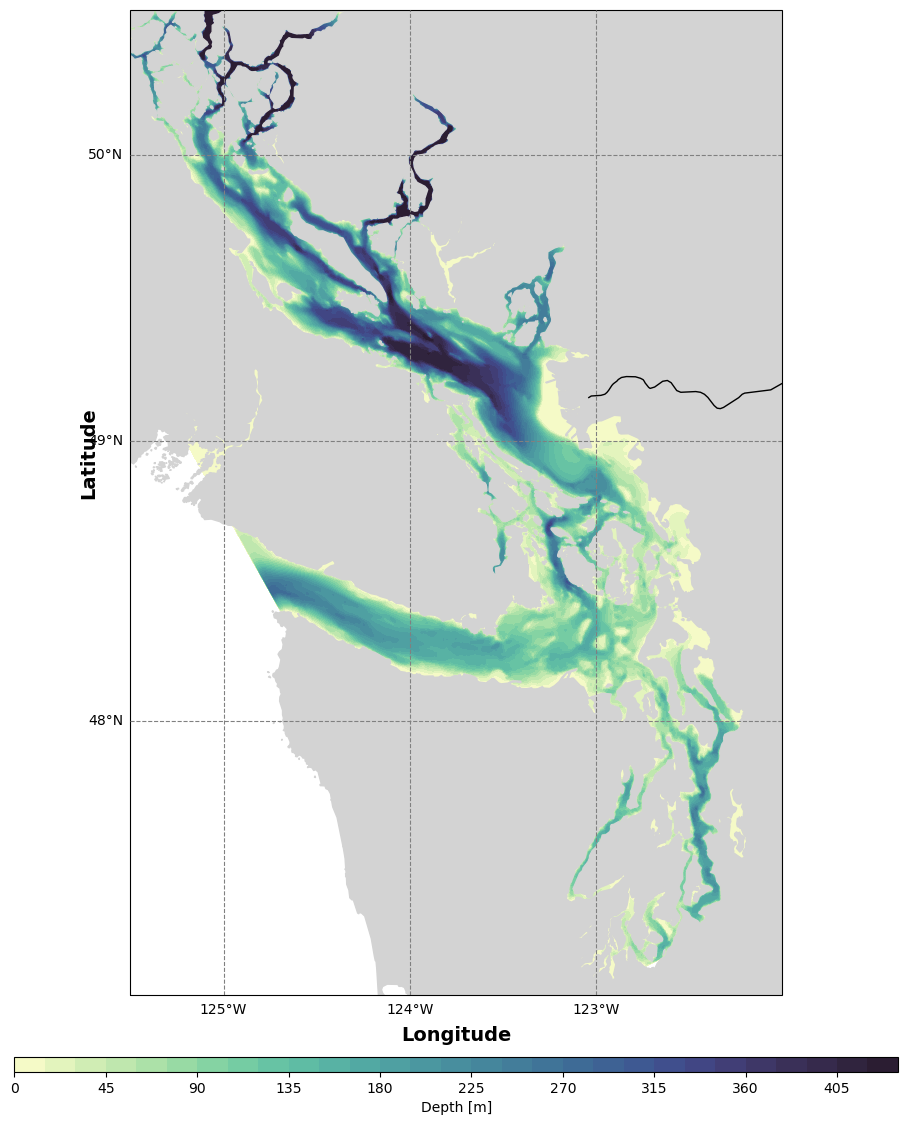

In [13]:
# Make map
blevels = list(np.arange(0,450,15))
fig, ax = plt.subplots(figsize=(38, 16), subplot_kw={'projection': crs.Mercator()})
ax.set_extent([-125.5, -122, 47, 50.5], crs=crs.PlateCarree())
ax.add_feature(feature.GSHHSFeature('high', facecolor='lightgray',edgecolor='lightgray'),zorder=2)
ax.add_feature(feature.RIVERS, edgecolor='k',zorder=5)
#ax.add_feature(feature.OCEAN,zorder=1)
im=ax.contourf(coords.nav_lon, coords.nav_lat, mask.bathym[0,:,:],zorder=1,transform=crs.PlateCarree(),cmap=cmap,levels=blevels)
#plt.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:]*10,zorder=1,transform=crs.PlateCarree(),colors='w',levels=blevels,linewidths=0.05)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

gl = ax.gridlines(
    linestyle='--', color='gray', draw_labels=True,
    xlocs=range(-125, -121), ylocs=range(47, 52),zorder=5)
gl.top_labels, gl.right_labels = False, False

cbar = fig.colorbar(im, location='bottom',aspect=60,shrink=0.3,pad=0.05)

cbar.set_label('Depth [m]')

ax.text(-0.05, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14,weight="bold")
ax.text(0.5, -0.05, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14,weight="bold")

plt.savefig("/Users/jvalenti/Desktop/baty.pdf")

In [11]:
states_provinces = feature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

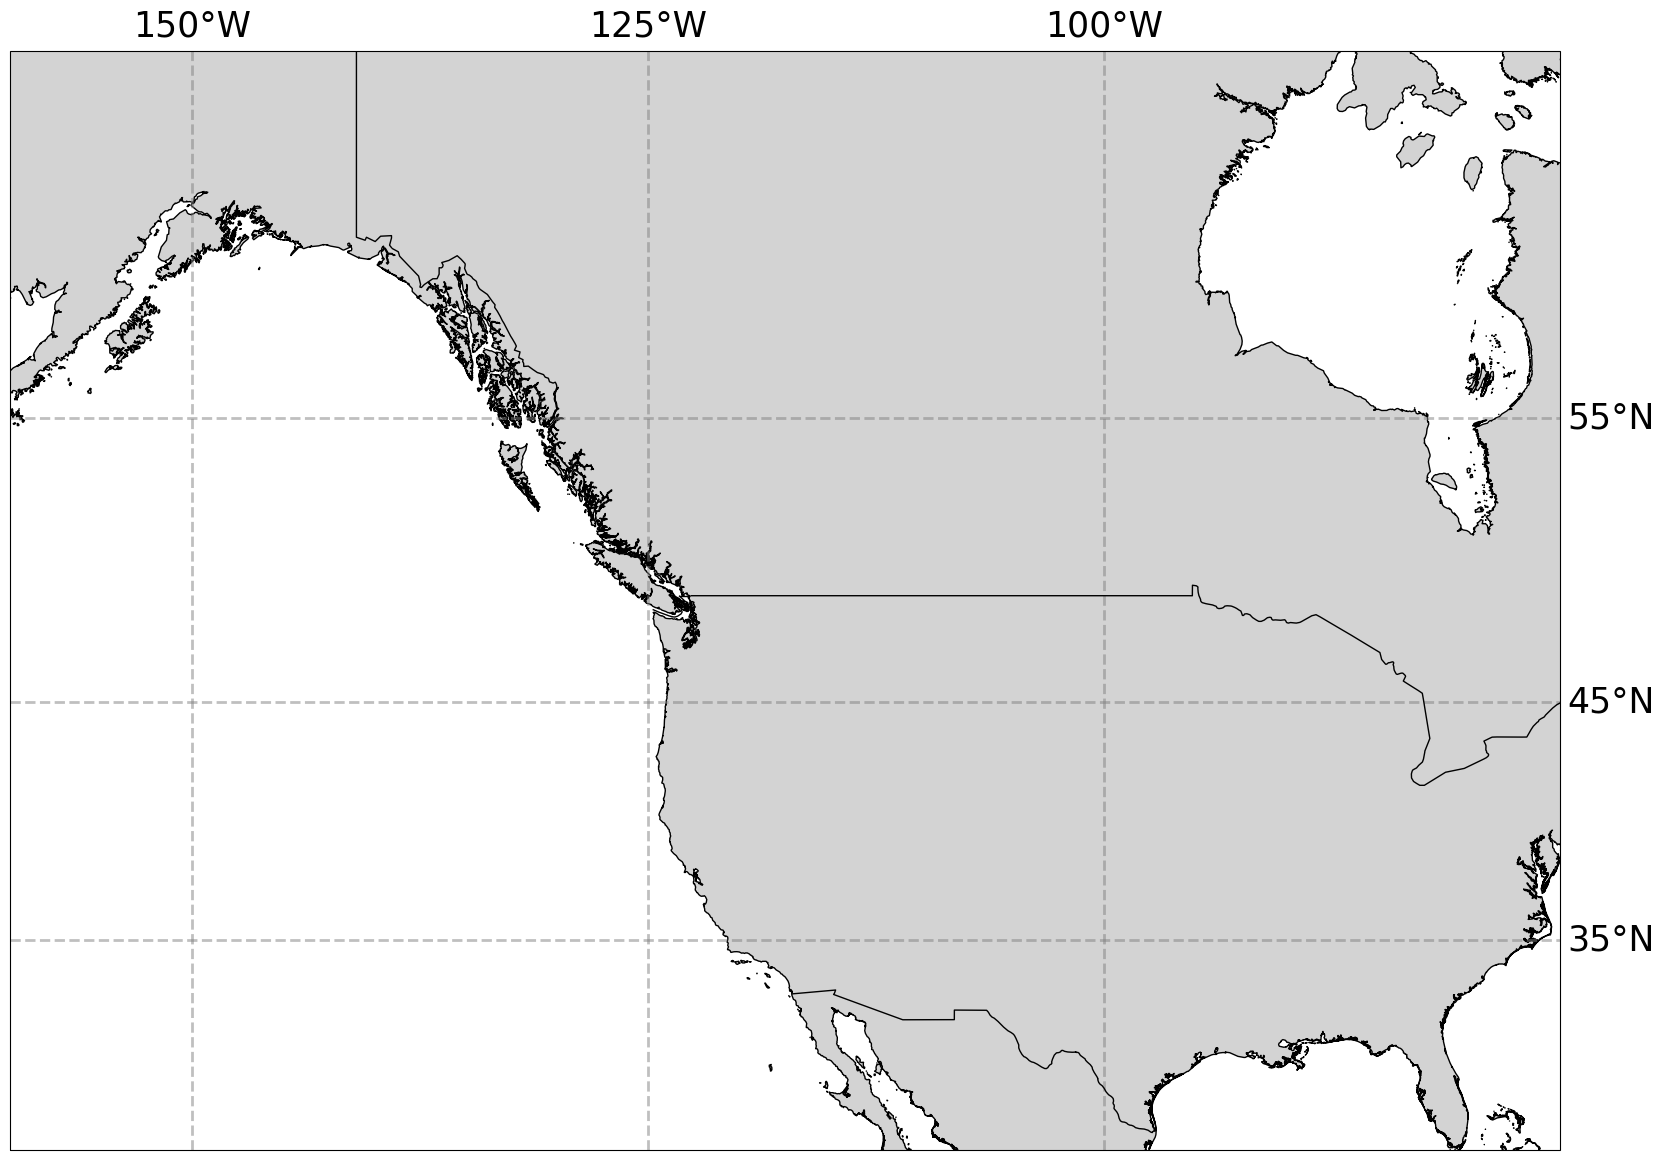

In [12]:
# Make map
fig, ax = plt.subplots(figsize=(20, 16), subplot_kw={'projection': crs.Mercator()})
ax.set_extent([-160, -75, 65, 25], crs=crs.PlateCarree())
ax.add_feature(feature.GSHHSFeature('intermediate', edgecolor='k', facecolor='lightgray'))
#ax.add_feature(feature.OCEAN,zorder=1)
ax.add_feature(feature.BORDERS,zorder=3)
gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, xlocs=np.linspace(-150,-50,5), ylocs=np.linspace(55,35,3),
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 25}
gl.ylabel_style = {'size': 25}
gl.bottom_labels, gl.left_labels = False, False
#plt.savefig("/Users/jvalenti/Desktop/map.pdf")